#"Data Cleaning and Visualization Automation Tool"

This project automates data cleaning by identifying/removing duplicate and constant columns and visualizes data distributions for insightful analysis.

##Loading the dataset

In [56]:
import pandas as pd

# Load the dataset
file_path = '/content/DS_Python_Assignment1.xlsx'
excel_data = pd.ExcelFile(file_path)
sheet_names = excel_data.sheet_names

print(f"Available sheet names: {sheet_names}")

correct_sheet_name = sheet_names[0]
data = excel_data.parse(correct_sheet_name)


Available sheet names: ['Data', 'What is required']


##Step - 1
 (List down all the columns with missing values)

In [57]:
def list_missing_values_with_labels(df):
    missing_summary = df.isnull().sum()
    missing_percentages = (missing_summary / len(df)) * 100
    missing_columns = missing_summary[missing_summary > 0].sort_values(ascending=False)

    # Label missing percentages
    def label_missing(percentage):
        if percentage == 0:
            return "No Missing"
        elif percentage <= 10:
            return "Low Missing"
        elif percentage <= 30:
            return "Moderate Missing"
        elif percentage <= 60:
            return "High Missing"
        else:
            return "Severe Missing"

    labels = missing_percentages[missing_columns.index].apply(label_missing)

    # Create a DataFrame with detailed information
    missing_values_df = pd.DataFrame({
        'Column': missing_columns.index,
        'Missing Count': missing_columns.values,
        'Missing Percentage': missing_percentages[missing_columns.index].values,
        'Missing Severity': labels.values
    })
    return missing_values_df

# List all columns with missing values and labels
missing_values_labeled = list_missing_values_with_labels(data)

print("Columns with Missing Values and Labels:")
print(missing_values_labeled)

Columns with Missing Values and Labels:
                                               Column  Missing Count  \
0                                                 AGE           5945   
1                                              INCOME           3259   
2                       CAPE: ETHNIC: POP: % HISPANIC           2872   
3               CAPE: HOMVAL: OOHU: MEDIAN HOME VALUE           2872   
4                CAPE: CHILD: HH: % WITH PERSONS LT18           2872   
5   CAPE: CHILD: HH: % MARR COUPLE FAMW- PERSONS LT18           2872   
6   CAPE: CHILD: HH: % MARR COUPLE FAMW-O PERSONS ...           2872   
7                  CAPE: LANG: HH: % SPANISH SPEAKING           2872   
8       CAPE: EDUC: POP25+: MEDIAN EDUCATION ATTAINED           2872   
9              CAPE: TENANCY: OCCHU: % OWNER OCCUPIED           2872   
10           CAPE: BUILT: HU: MEDIAN HOUSING UNIT AGE           2872   
11           CAPE: HHSIZE: HH: AVERAGE HOUSEHOLD SIZE           2872   
12            CAPE: TENA

In [58]:
# Save to a file
missing_values_labeled.to_csv('Missing_Values.csv', index=False)
print("Missing values report saved to CSV file")

Missing values report saved to CSV file


## Step - 2
(Categotize the columns based upon their data type and print, for ex: print all the numeric variables and other data types as well)

In [59]:
def categorize_columns(df):
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    datetime_columns = df.select_dtypes(include=['datetime']).columns.tolist()
    other_columns = df.select_dtypes(exclude=['number', 'object', 'datetime']).columns.tolist()

    return numeric_columns, categorical_columns, datetime_columns, other_columns

numeric_cols, categorical_cols, datetime_columns, other_columns = categorize_columns(data)

print("\nNumeric Columns:")
print(numeric_cols[:5], f"... (Total: {len(numeric_cols)})")
print("\nCategorical Columns:")
print(categorical_cols[:5], f"... (Total: {len(categorical_cols)})")
print("\nDatetime Columns:")
print(datetime_columns[:5], f"... (Total: {len(datetime_columns)})")
print("\nOther Columns:")
print(other_columns[:5], f"... (Total: {len(other_columns)})")


Numeric Columns:
['CUSTOMERID', 'LCPCOUNT', 'TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'FEMALE'] ... (Total: 114)

Categorical Columns:
['STATE', 'PRIVATELABELTENDERFLAG', 'MOSAIC'] ... (Total: 3)

Datetime Columns:
[] ... (Total: 0)

Other Columns:
[] ... (Total: 0)


##Step - 3
(List the columns with duplicates a. Remove them b. Print before and after)

In [60]:
def find_duplicate_columns(df):
    duplicate_columns = []
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2 and col1 not in duplicate_columns and col2 not in duplicate_columns:
                if df[col1].equals(df[col2]):
                    duplicate_columns.append(col2)
    return duplicate_columns

# Step 2: Identify duplicate columns
duplicate_cols = find_duplicate_columns(data)
print("\nDuplicate Columns:")
print(duplicate_cols)


Duplicate Columns:
['CHILDREN', '7-Cost Only Spend', 'CAPE: HHSIZE: HH: AVERAGE HOUSEHOLD SIZE']


In [61]:
# Printing data before removing duplicate columns
print("\nData Before Removing Duplicate Columns:")
print(data)


Data Before Removing Duplicate Columns:
      CUSTOMERID STATE  LCPCOUNT PRIVATELABELTENDERFLAG  TENURE_IN_MONTHS  \
0           5001    TX         1                      N              -9.0   
1           5002    OH         0                      Y               9.0   
2           5003    TX         0                      N              12.0   
3           5004    TN         0                      N              -1.0   
4           5005    TX         0                      N              16.0   
...          ...   ...       ...                    ...               ...   
9995       14996    PA         1                      Y             139.0   
9996       14997    PA         1                      N              28.0   
9997       14998    DC         2                      N              10.0   
9998       14999    CO         1                      N              23.0   
9999       15000    TX         1                      N             229.0   

      CLOSESTSTOREDISTANCE  FEMALE

In [62]:
data_after = data.drop(columns=duplicate_cols)

# Printing data after removing duplicate columns
print("\nData After Removing Duplicate Columns:")
print(data_after)


Data After Removing Duplicate Columns:
      CUSTOMERID STATE  LCPCOUNT PRIVATELABELTENDERFLAG  TENURE_IN_MONTHS  \
0           5001    TX         1                      N              -9.0   
1           5002    OH         0                      Y               9.0   
2           5003    TX         0                      N              12.0   
3           5004    TN         0                      N              -1.0   
4           5005    TX         0                      N              16.0   
...          ...   ...       ...                    ...               ...   
9995       14996    PA         1                      Y             139.0   
9996       14997    PA         1                      N              28.0   
9997       14998    DC         2                      N              10.0   
9998       14999    CO         1                      N              23.0   
9999       15000    TX         1                      N             229.0   

      CLOSESTSTOREDISTANCE  FEMALE 

##Step - 4
(List the constant columns a. Remove them b. Print before and after)

In [63]:
# Identifying and remove constant columns
def find_constant_columns(df):
    constant_columns = [col for col in df.columns if df[col].nunique() <= 1]
    return constant_columns

In [65]:
constant_cols = find_constant_columns(data)
print("\nConstant Columns:")
print(constant_cols)


Constant Columns:
['MARRIED', 'CHILDREN', '7-Cost Only Spend']


In [66]:
# Printing dataset before removing constant columns
print("\nBefore Removing Constant Columns:")
print(data.head())


Before Removing Constant Columns:
   CUSTOMERID STATE  LCPCOUNT PRIVATELABELTENDERFLAG  TENURE_IN_MONTHS  \
0        5001    TX         1                      N              -9.0   
1        5002    OH         0                      Y               9.0   
2        5003    TX         0                      N              12.0   
3        5004    TN         0                      N              -1.0   
4        5005    TX         0                      N              16.0   

   CLOSESTSTOREDISTANCE  FEMALE  AGE  HS_DIPLOMA  SOME_COLLEGE  ...  \
0                   NaN       0  NaN           0             0  ...   
1              8.728943       0  NaN           0             0  ...   
2                   NaN       0  NaN           0             0  ...   
3                   NaN       0  NaN           0             0  ...   
4                   NaN       0  NaN           0             0  ...   

   MDAYREV_L3Y  MDAYREV_L4Y  MDAYQTY_L1Y  MDAYQTY_L2Y  MDAYQTY_L3Y  \
0          0.0         

In [67]:
# Remove all the constant columns
data = data.drop(columns=constant_cols)

In [68]:
# Printing dataset before removing constant columns
print("\nBefore Removing Constant Columns:")
print(data.head())


Before Removing Constant Columns:
   CUSTOMERID STATE  LCPCOUNT PRIVATELABELTENDERFLAG  TENURE_IN_MONTHS  \
0        5001    TX         1                      N              -9.0   
1        5002    OH         0                      Y               9.0   
2        5003    TX         0                      N              12.0   
3        5004    TN         0                      N              -1.0   
4        5005    TX         0                      N              16.0   

   CLOSESTSTOREDISTANCE  FEMALE  AGE  HS_DIPLOMA  SOME_COLLEGE  ...  \
0                   NaN       0  NaN           0             0  ...   
1              8.728943       0  NaN           0             0  ...   
2                   NaN       0  NaN           0             0  ...   
3                   NaN       0  NaN           0             0  ...   
4                   NaN       0  NaN           0             0  ...   

   MDAYREV_L3Y  MDAYREV_L4Y  MDAYQTY_L1Y  MDAYQTY_L2Y  MDAYQTY_L3Y  \
0          0.0         

In [69]:
# Saving the cleaned data in a excel file
cleaned_file_path = 'Output_Data.xlsx'
data.to_excel(cleaned_file_path, index=False)
print(f"\nCleaned data saved to: {cleaned_file_path}")


Cleaned data saved to: Output_Data.xlsx


##Step - 5
(Create box plot to visualise the outliers of all the numeric columns)

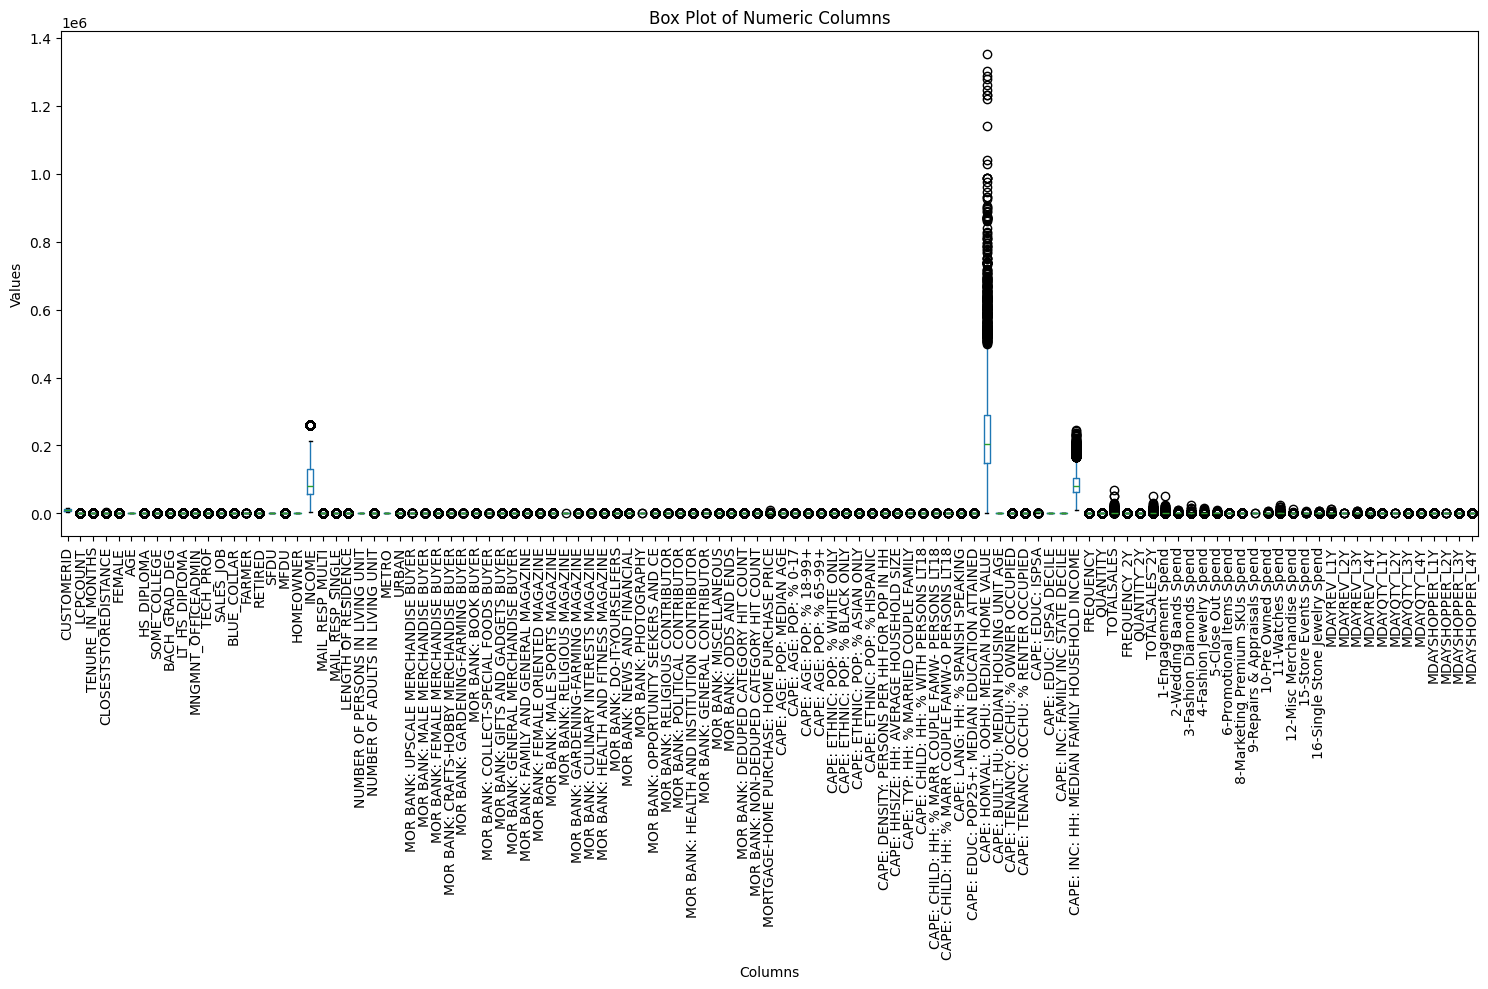

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=['number'])


plt.figure(figsize=(15, 10))
numeric_data.boxplot(rot=90)
plt.title('Box Plot of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(False)
plt.tight_layout()

# Display the plot
plt.show()

##Step - 6
(Create charts for any 6 columns and show their distribution) - Creating with forst

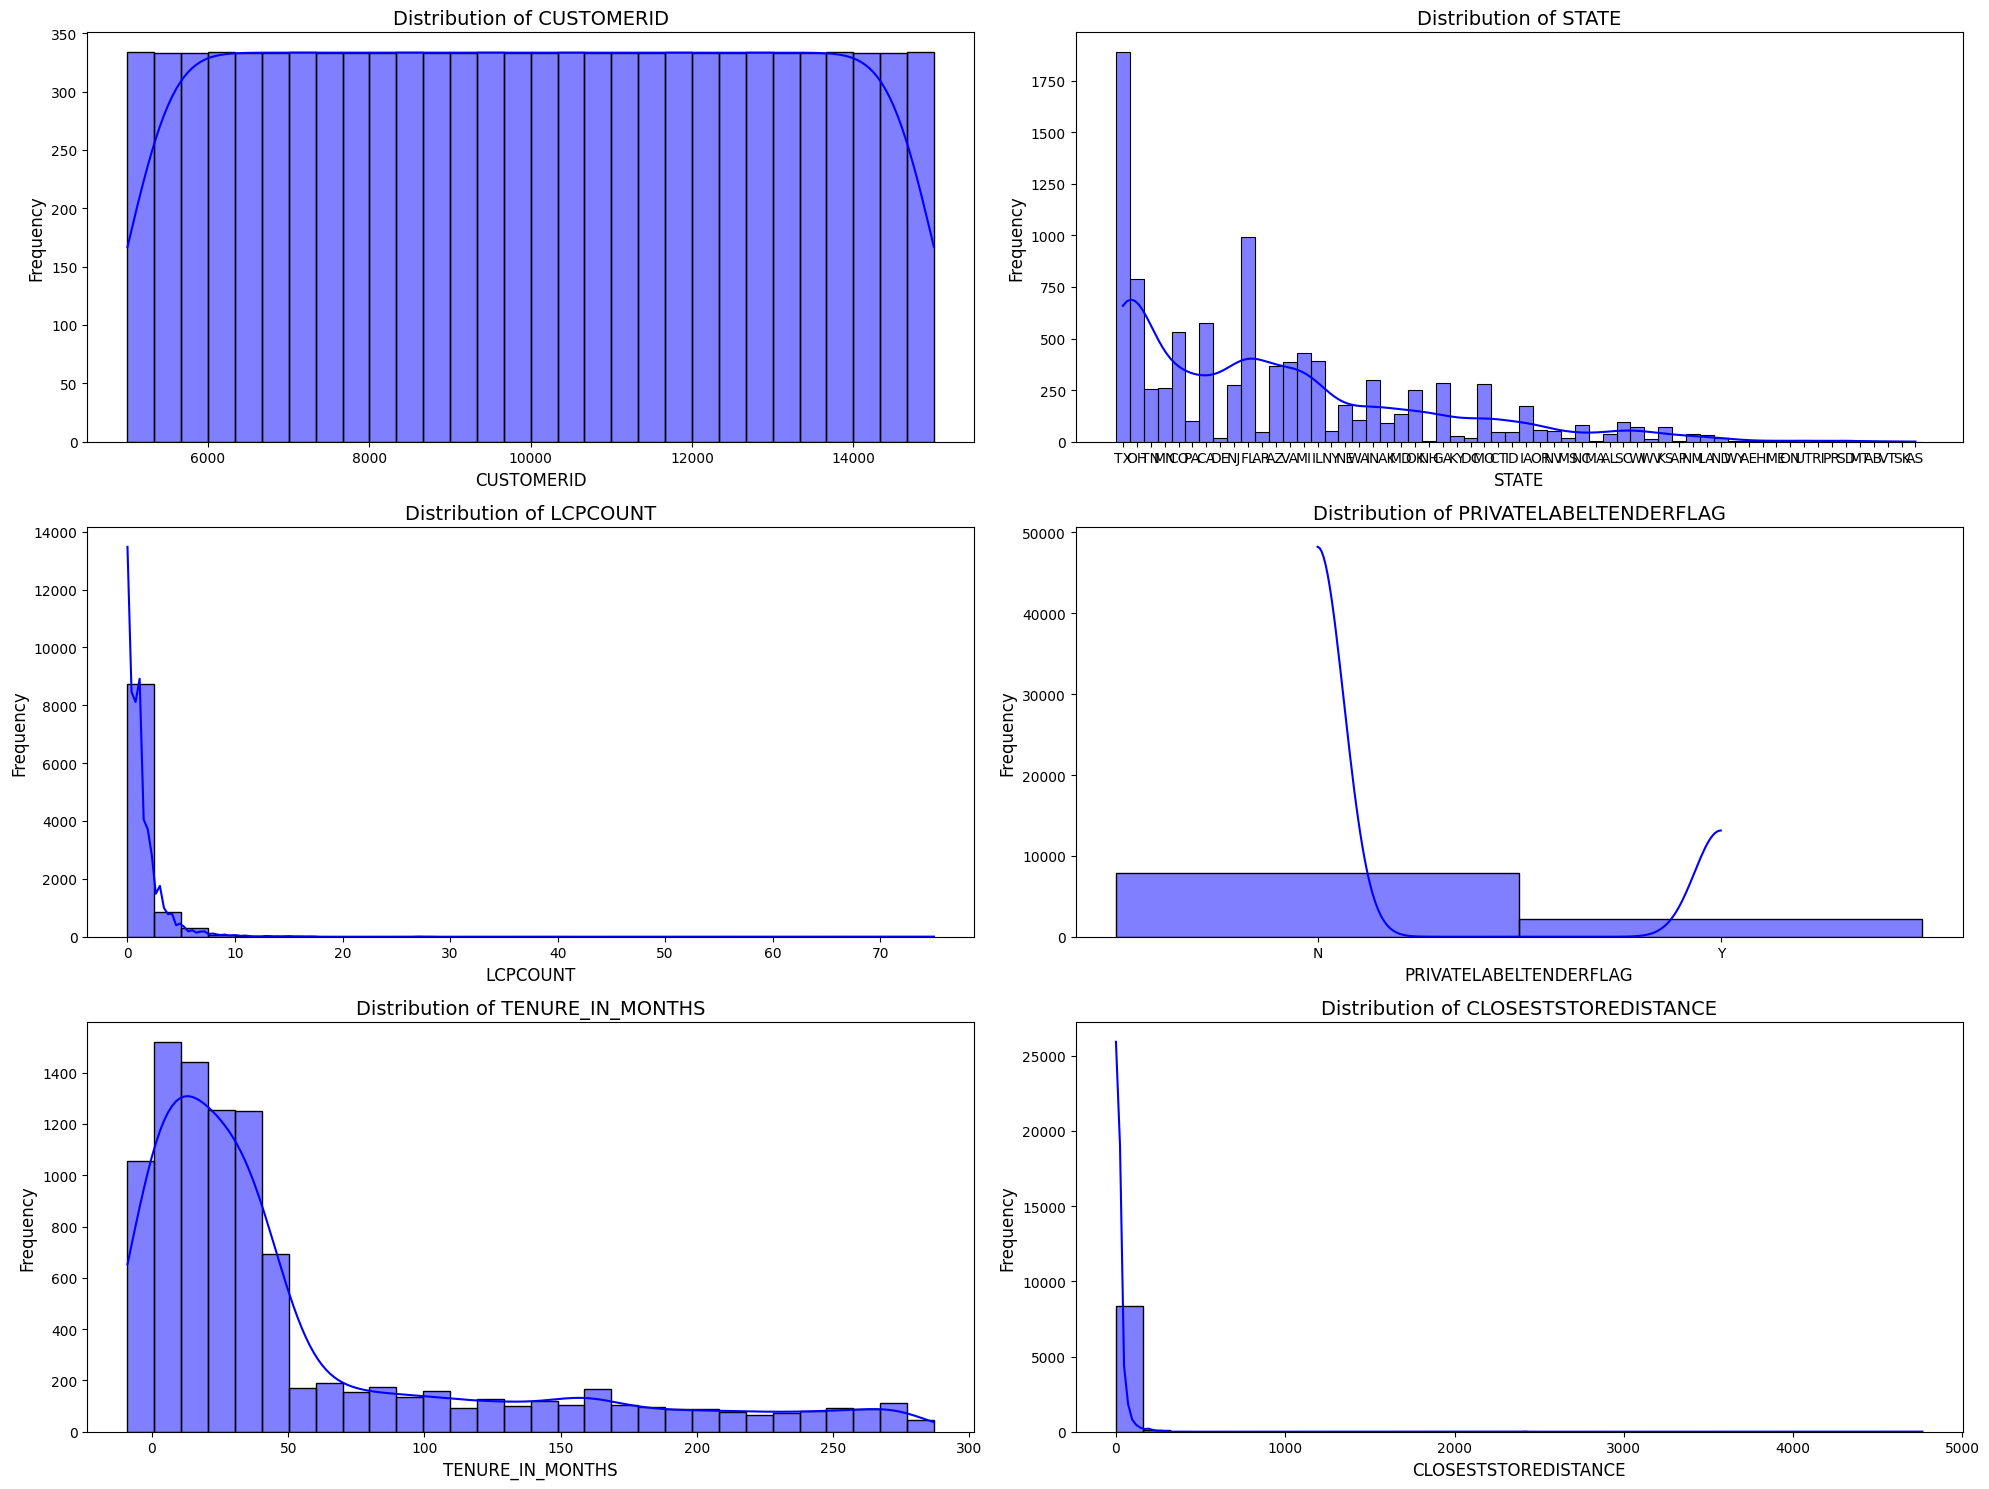

In [71]:
import seaborn as sns
# First 6 Coloumns
columns_to_plot = data.columns[:6]
plt.figure(figsize=(20, 15))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col].dropna(), kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(False)

plt.tight_layout()
plt.show()

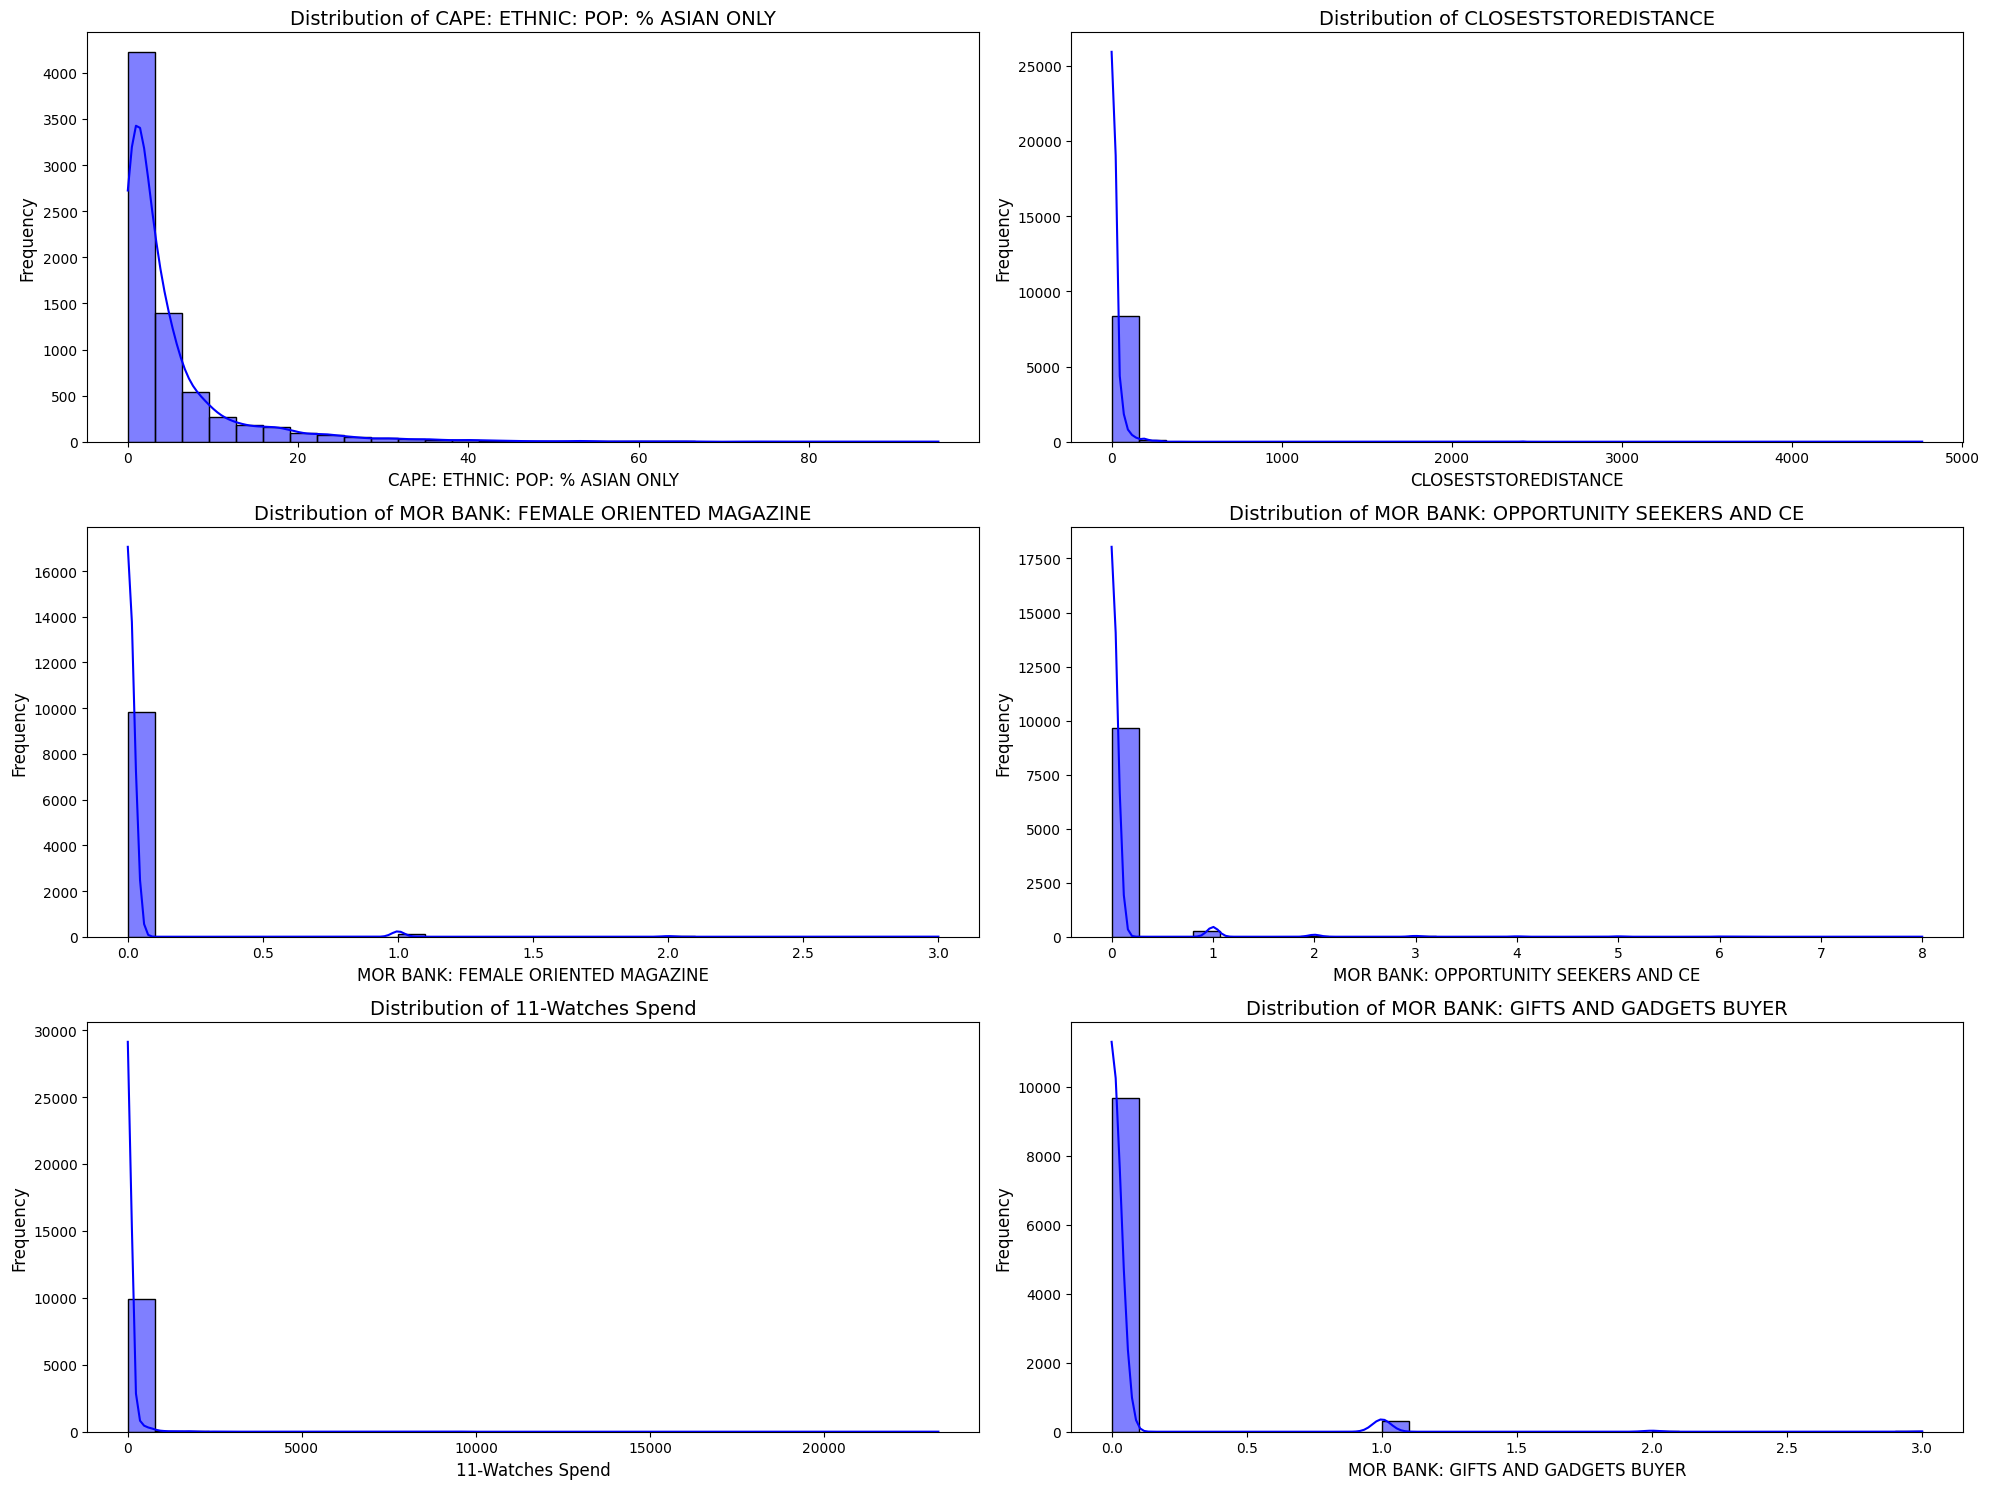

In [72]:
import random

# Any Random 6
columns_to_plot = random.sample(list(data.columns), 6)

plt.figure(figsize=(20, 15))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col].dropna(), kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(False)

plt.tight_layout()
plt.show()